# Exercize: Lady tasting tea
A lady claimed to be able to tell whether the tea or the milk was added first to a cup. Fisher proposed to give her eight cups, four of each variety, in random order. 

1. What is the critical region at 5%? If we ask for a $5\sigma$ evidence, what's the minimum amount of cups we have to prepare? (Hint: look at the Hypergeometric distribution, answer should be 26).
2. Are we interested in the rare case when the lady never guess? What is "more extreme" in this case?

### The hypergeometric function
Assume that this experiment is repeated multiple times. The frequency of attempts where the lady successfully picks the cups where the milk was added first can be described by the hypergeometric distribution:

\begin{equation}
    P ( k | N, n, K) = \binom{K}{k}\binom{N-K}{n-k} / \binom{N}{n}
\end{equation}

where:
* $k$ is the observed number, and corresponds to the frequency of attempts where the lady successfully picks the cups where the milk was added first;
* $N$ is the total number of cups out of which the lady might pick (in this case, $N=8$);
* $n$ corresponds to the number of cups that the lady is allowed to pick ($n=4$);
* $K$ is the number of cups where the the milk was actually poured first, i.e. the true number of successes (in this case, $K=4$).

The hypergeometric distribution becomes:
\begin{equation}
\begin{split}
    P ( k | N=8, n=4, K=4) & = \binom{4}{k}\binom{4}{4-k} / \binom{8}{4} \\
    & = \binom{4}{k}\binom{4}{4-k} / 1860
\end{split}
\end{equation}

### Rejection region at $\alpha = 5\%$
We would like to obtain the frequency of attempts where the lady correctly picks the cups where the milk was added first that is necessary to exclude the **null hypothesis** with a type-I error rate of $\alpha = 5\%$.

In this example, the null hypothesis $H_{0}$ is that the lady is not able to distinguish the cups of tea and picks randomly. After fixing the rate of the type-I error (i.e. false discovery) to $\alpha = 5\%$, we would like to find the rejection region, which means finding the minimum value of the test statistic $q_{\alpha}$, such that the p-value = $\int_{q_{\alpha}}^{\infty} f(q | H_{0}) d q \leq \alpha$.

We choose, as test statistic, the frequency of trials where the lady picks the cups correctly (i.e. 0,1,2,3, or 4 out of 4 cups picked correctly, among 8 choices). In this case, the test statistic is described by the hypergeometric distribution $P ( k | N=8, n=4, K=4)$.

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 20})

In [3]:
# parameters of the hypergeometric distribution
[N,n,K] = [8,4,4]

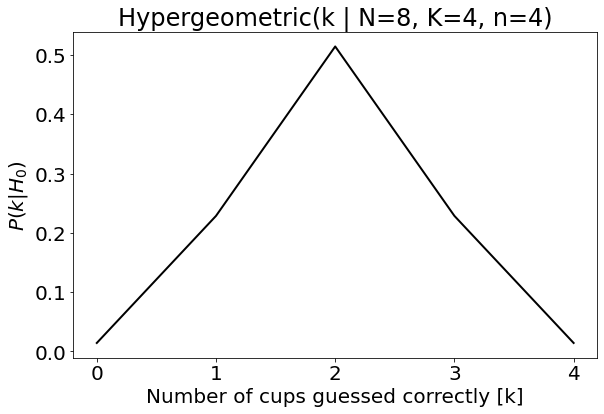

In [4]:
# plot the hypergeometric distribution
fig, ax = plt.subplots(1, 1, figsize=(9.4, 6))
# x values
x = np.arange(stats.hypergeom.ppf(0.001, N, K, n), stats.hypergeom.ppf(1, N, K, n)+1)
# y values
y = stats.hypergeom.pmf(x, N, K, n)
ax.plot(x, y, color='k', linewidth=2, label = 'Hypergeometric distribution')
# make pretty
ax.set_xlabel("Number of cups guessed correctly [k]")
ax.set_ylabel("$P(k | H_{0})$")
ax.set_title("Hypergeometric(k | N={N}, K={K}, n={n})".format(N=N, K=K, n=n))
plt.show()

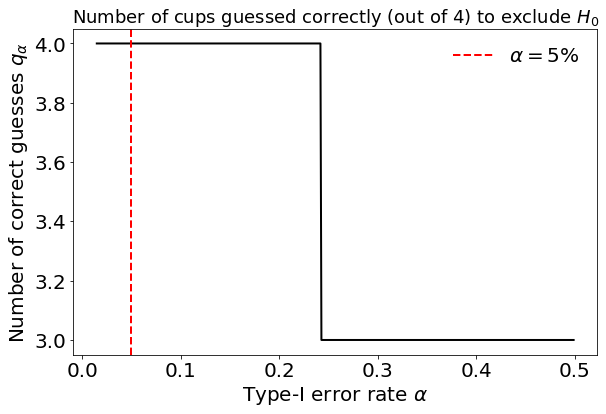

In [5]:
# rate of type-I error (alpha) (check from 1% to 50%)
alpha = np.arange(0.01, 0.5, 0.001)
# find the values of the test statistic qalpha such that the p-value = alpha
qalpha = stats.hypergeom.isf(alpha, N, K, n) # isf does not include the qalpha in the sum / integral! # we need to add 1
qalpha = qalpha + 1
# plot qalpha for each alpha and highlight the rejection region (for alpha = 0.5)
# only onsider the values of qalpha that makes sense (between 0 to 4 included)
mask = (qalpha <= 4) & (qalpha >= 0)
qalpha = qalpha[mask]
alpha = alpha[mask]

fig, ax = plt.subplots(1,1,figsize=(9.4,6))
ax.plot(alpha, qalpha, color = 'k', linewidth = 2)

ax.axvline(0.05, color='r', linestyle='--', linewidth=2., label =r"$\alpha = 5\%$")

ax.set_xlabel(r"Type-I error rate $\alpha$")
ax.set_ylabel(r"Number of correct guesses $q_{\alpha}$")

ax.set_title("Number of cups guessed correctly (out of 4) to exclude $H_{0}$", fontsize=18)

ax.legend(loc='upper right', frameon = False)

plt.show()

In order to obtain a p-value equal to or smaller than $\alpha = 5\%$, the minimum $q_{\alpha}$ is equal to 4. 

Therefore, in order to exclude the null hypothesis $H_{0}$ with $\alpha = 5\%$, the lady needs to pick correctly all the four cups where milk has been poured first.

### Total number of cups needed to have a $5\sigma$ evidence
In order to have a $5\sigma$ evidence that the lady is able to distinguish the cups where the milk (or tea) has been added first, we need to exclude the null hypothesis $H_{0}$ with $\alpha = 2.87 \cdot 10^{-7}$.

This number is obtained from the following equation:
\begin{equation}
    Z = 1-\Phi^{-1}(\alpha)
\end{equation}
where $\Phi^{-1}$ is the inverse of the cumulative function of a standard gaussian distribution (with mean $\mu=0$ and standard deviation $\sigma=1$), and setting $Z=5$.

In [59]:
Z = 5
alpha_5sigma_evidence = stats.norm.sf(5)
print("Z = {Z}, alpha = {alpha}".format(Z=Z, alpha=alpha_5sigma_evidence))

Z = 5, alpha = 2.8665157187919333e-07


In the previous example, if the lady could pick among $N=8$ total cups, we could exclude the null hypothesis at $\alpha=5\%$ only if the lady picked all the four cups correctly. To have a $5\sigma$ evidence, we need to increase the total number of cups $N$ that the lady might choose from. We modify the experiment, changing the number of cups: out of $N$ total cups, there are $K=N/2$ cups where the milk was actually poured first, and the lady is allowed to have $n=N/2$ attempts to guess which are these cups. The hypergeometric distribution $P(k | N, n, K)$ describes the probability that the lady correctly picks, with $n$ draws, $k$ out of $K$ cups out of a total number $N$.

The model is the similar: the test statistic $k$ follows a hypergeometric function with variable $N$, $n=N/2$ and $K=N/2$. We need to find the value of $N$ such that we have a valid $q_{\alpha}$ for $\alpha = 2.87 \cdot 10^{-7}$.

/var/folders/qf/_rcvzfvn59v89w6828p44rq40000gn/T/ipykernel_78070/1032539430.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(alpha, N, qalpha_masked, cmap='PiYG')


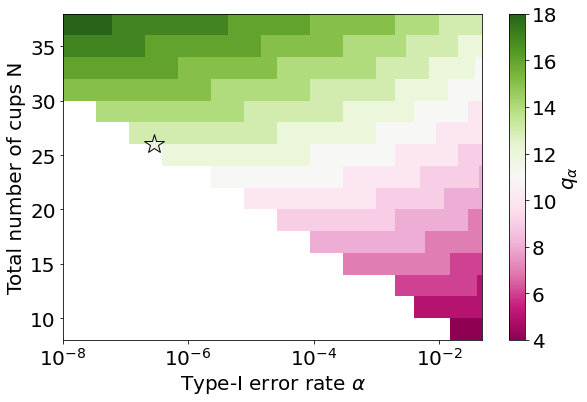

In [65]:
# plot a 2-dimensional histogram with
# x = alphas (check from 10^{-8} to 0.05)
# y = total number of cups that the lady can choose from (N, check from 8 to 40)
# z = qalpha, given a distribution (fixed N) and a p-value alpha
alpha = np.sort(np.concatenate((np.logspace(-8, -3, 20), np.arange(0.001, 0.05, 0.001))))
N = np.arange(8,40,2)
K = N/2
n = N/2
qalpha = stats.hypergeom.isf(alpha.reshape(len(alpha), 1), N, K, n)
qalpha = qalpha.T + 1

# now fill with white the areas that do not make sense (i.e. where qalpha > K)
# prepare a matrix with the K values (= N/2)
# we can at most pick K cups for each N
max_correct_picks = K.reshape(len(K), 1).T*np.ones(shape=(len(alpha), len(N)))
mask = qalpha > max_correct_picks.T
qalpha_masked = np.ma.masked_where(mask, qalpha)

fig, ax = plt.subplots(1,1,figsize=(9.4,6))
im = ax.pcolormesh(alpha, N, qalpha_masked, cmap='PiYG')
ax.set_xscale("log")

ax.set_xlabel(r"Type-I error rate $\alpha$")
ax.set_ylabel(r"Total number of cups N")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$q_{\alpha}$")

# now highlight the point corresponding to alpha = 2.87 * 10^{-7}
# and the minimum N such that we have a valid qalpha (<=K) for that (N, alpha)
# by looking at the plot, minimum N should be 26
N_5sigma_evidence = 26
ax.plot(alpha_5sigma_evidence, N_5sigma_evidence, linewidth = 0, marker = '*', markersize = 20, color = '#E9F1DF', markeredgecolor = 'black')

plt.show()

In order to exclude the null hypothesis $H_{0}$ with a $\alpha=2.87\cdot 10^{-7}$, i.e. in order to have a $5\sigma$ evidence that the lady is able to tell whether milk or tea was added first in a cup of tea, we need to modify the original experiment. The minimum number of cups that we need is 26 (13 where milk is poured first and 13 where the tea is poured first), and the lady needs to correctly pick all the 13 cups where the milk was added first.

In [73]:
qalpha_5sigma_evidence = N_5sigma_evidence/2 # the sum for the survival function does not include the first qalpha # we need to include it
pvalue = stats.hypergeom.sf(qalpha_5sigma_evidence-1, N_5sigma_evidence, N_5sigma_evidence/2, N_5sigma_evidence/2)
print("Number of cups: {N}, qalpha: {qalpha}, p-value: {alpha}".format(N=N_5sigma_evidence, qalpha=qalpha_5sigma_evidence, alpha=pvalue))

Number of cups: 26, qalpha: 13.0, p-value: 9.61482991365883e-08


### Case where the lady never guesses
If we give the lady 26 cups of tea (13 where milk is poured first and 13 where the tea is poured first), the event that the lady picks wrongly for each of her attempts is equally unlikely with respect to picking all cups correctly (under the null hypothesis, which is that the lady does not distinguish the cups and picks randomly).

The observation $k=0$ is equally unlikely with respect to $k=13$.

In [80]:
# calculate the probabilities for kobs = 0 and 13
probabilities = stats.hypergeom.pmf([0,13], N_5sigma_evidence, N_5sigma_evidence/2, N_5sigma_evidence/2)
print("kobs: %s, probabilities: %s" % ([0,13], probabilities))

kobs: [0, 13], probabilities: [9.61482991e-08 9.61482991e-08]


If the lady never guesses correctly (i.e. $k_{obs}=0$), we should look at the left side of the hypergeometric function to calculate the p-values. In this case, the equally or more extreme situation with respect to the observed data is that the lady picks zero cups correctly.

The p-value becomes the cumulative distribution of the hypergeometric function for $k$ up to $k_{obs}=0$.

In [82]:
pvalue = stats.hypergeom.cdf(0, N_5sigma_evidence, N_5sigma_evidence/2, N_5sigma_evidence/2)
print("kobs: {kobs}, pvalue under the null hypothesis: {pvalue}".format(kobs=0, pvalue=pvalue))

kobs: 0, pvalue under the null hypothesis: 9.61482991365883e-08


If we observe $k_{obs}=0$, we are still able to exclude the null hypothesis with a $5\sigma$ evidence. 
Our tests tells us that we can exclude that the lady is not able to tell the difference between the cups and picks randomly, but, at the same time, we can't conclude that the lady is able to tell for which cups the milk has been poured first.